## Install and import required modules

In [ ]:
#!pip install pandas-gbq
#!pip install wfd

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import csv

import pandas as pd

from Modules.Data_Loader import *
from Modules.Feature_Extraction import *

# Data Extraction
#### Data is read and extracted from the database using the wfdb toolbox which is designed to read mimic iv data

In [2]:
database_name = 'mimic4wdb/0.1.0'
max_records_to_load = 200

#read data from database
records = load_Data(database_name, max_records_to_load)

# Data Preprocessing
#### 1. Records are filtered out to keep only those records that contain atleast one hour of aVR, ABP, Pleth and Resp signals
<br>

* It is assumed that the ECG, Blood Pressure and O2 waveform data is most essential for monitoring pateint condition hence these signals are chosen.
<br>

- Moreover, the time series will be split into buckets of 1 hour, hence all patient data which doesn't have atleast 1 hour of continous signals are filtered out

In [3]:
required_sigs = ['aVR', 'ABP', 'Pleth', 'Resp', 'II']
req_seg_duration = 60*60

matching_records = filter_Data(database_name, required_sigs, req_seg_duration, records)

A total of 44 records met the requirements:


In [41]:
#extract signals
#aVR,fs = extract_Signal(matching_records, "aVR",30)
#abp,fs = extract_Signal(matching_records, "ABP",30)
#ppg,fs = extract_Signal(matching_records, "Pleth",30)
ecg,fs = extract_Signal(matching_records, "II",30)

#### 2. Remove NaNs

In [68]:
ecg_ffill = []
# aVR_ffill = []
# abp_ffill = []
# ppg_ffill = []

for i in range(len(ecg)):
        ecg_ffill.append(Remove_nan(np.array(ecg[i])))

# for i in range(len(aVR)):
#         aVR_ffill.append(Remove_nan(np.array(aVR[i])))
#
# for i in range(len(ppg)):
#         ppg_ffill.append(Remove_nan(np.array(ppg[i])))
#
# for i in range(len(abp)):
#         abp_ffill.append(Remove_nan(np.array(abp[i])))

#### 3. Remove noise using Butterworth filter

In [69]:
#avr_filt = reduce_noise_butterworth(aVR_ffill, fs)
#abp_filt = reduce_noise_butterworth(abp_ffill, fs)
#ppg_filt = reduce_noise_butterworth(ppg_ffill, fs)
ecg_filt = reduce_noise_butterworth(ecg_ffill, fs)

# PLOT Original and Corrected Signals

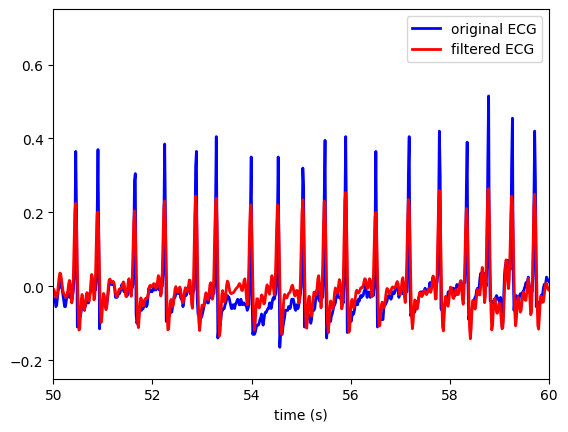

In [70]:
def Plot_signals(original_sig, filtered_sig, label_original_sig, label_filtered_sig, ylim):
        fig, ax = plt.subplots()
        t = np.arange(0, len(original_sig))/fs[0]

        ax.plot(t, original_sig,
                linewidth=2.0,
                color = 'blue',
                label =label_original_sig )

        ax.plot(t, filtered_sig,
                linewidth=2.0,
                color = 'red',
                label = label_filtered_sig)

        ax.set(xlim=(0, 1000))
        plt.xlabel('time (s)')
        plt.xlim([50, 60])
        plt.ylim(ylim)
        plt.legend()
        plt.show()

#Plot_signals(abp[0], abp_filt[0], "original ABP", "filtered ABP", [-50,150])
#Plot_signals(aVR[0], avr_filt[0], "original AVR", "filtered AVR", [-0.25,0.25])
#Plot_signals(ppg[0], ppg_filt[0], "original PPG", "filtered PPG", [-0.5,1])
Plot_signals(ecg[0], ecg_filt[0], "original ECG", "filtered ECG", [-0.25,0.75])

# Save Data to CSV

In [71]:
# os.makedirs('Preprocessed_data/abp', exist_ok=True)
# os.makedirs('Preprocessed_data/ppg', exist_ok=True)
# os.makedirs('Preprocessed_data/avr', exist_ok=True)
# os.makedirs('Preprocessed_data/ecg', exist_ok=True)

def write_to_csv(filepath, signals):
        with open(filepath, 'w') as f:
                csv_writer = csv.writer(f)
                csv_writer.writerows(signals)

# write_to_csv('Preprocessed_data/abp/abp_unfiltered.csv', abp_ffill)
# write_to_csv('Preprocessed_data/abp/abp_filtered.csv', abp_filt)

# write_to_csv('Preprocessed_data/ppg/ppg_unfiltered.csv', ppg_ffill)
# write_to_csv('Preprocessed_data/ppg/ppg_filtered.csv', ppg_filt)

# write_to_csv('Preprocessed_data/avr/avr_unfiltered.csv', aVR_ffill)
# write_to_csv('Preprocessed_data/avr/avr_filtered.csv', avr_filt)

write_to_csv('Preprocessed_data/ecg/ecg_unfiltered.csv', ecg_ffill)
write_to_csv('Preprocessed_data/ecg/ecg_filtered.csv', ecg_filt)

In [72]:
#os.makedirs('data/fs', exist_ok=True)
with open('data/fs/fs.csv', 'w') as file:
        writer = csv.writer(file)
        writer.writerow(fs)